In [1]:
import matplotlib.pyplot as plt 
import numpy as np

## Color maping of the Mandelbrot set

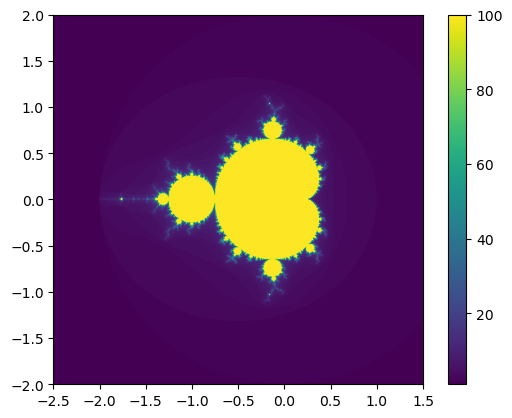

In [3]:
# Mandelbrot set identification under certain number of iteration 
def mandelbrot(c, num_iter):
    z = 0
    for n in range(num_iter):
        # The divergence condition
        if abs(z) > 2:
            return n
        z = z*z + c
    return num_iter

def compute_mandelbrot(Nx, Ny, x_min, x_max, y_min, y_max, num_iter):
    x = np.linspace(x_min, x_max, Nx)
    y = np.linspace(y_min, y_max, Ny)
    
    C = np.array(np.meshgrid(x, y)).reshape(2, Nx*Ny).T
    return np.array([mandelbrot(complex(c[0], c[1]), num_iter) for c in C]).reshape(Ny, Nx)

# Parameters for visualization
x_min, x_max = -2.5, 1.5
y_min, y_max = -2, 2
Nx, Ny = 1000, 1000
num_iter = 100

mandelbrot_image = compute_mandelbrot(Nx, Ny, x_min, x_max, y_min, y_max, num_iter)

# Visualization
plt.imshow(mandelbrot_image, extent=(x_min, x_max, y_min, y_max))
plt.colorbar()
plt.show()

## Area estimation by pure random sampling

In [50]:
def monte_carlo_mandelbrot_area(max_iter, max_sample, x_min, x_max, y_min, y_max):
    """Estimate the area of the Mandelbrot set using Monte Carlo integration."""
    count_in_set = 0
    for _ in range(max_sample):
        real = np.random.uniform(x_min, x_max)
        imag = np.random.uniform(y_min, y_max)
        c = complex(real, imag)
        if mandelbrot(c, max_iter) == max_iter:
            count_in_set += 1

    # Area of the region sampled
    area_sampled = (x_max - x_min) * (y_max - y_min)

    # Estimate of Mandelbrot set area
    area_estimate = area_sampled * (count_in_set / max_sample)

    return area_estimate

# Example usage
x_min, x_max = -2.5, 1.5
y_min, y_max = -2, 2

iter = 1000  # Example number of iterations
samples = 100000   # Example number of samples
area_estimate = monte_carlo_mandelbrot_area(iter, samples, x_min, x_max, y_min, y_max)
print(area_estimate)


1.51648


## Estimated results vary with i

A_i,s =  1.5088
A_j,s and diff: [(100, 1.5496, 0.04080000000000017), (1000, 1.50464, -0.0041599999999999415), (10000, 1.52096, 0.01216000000000017), (100000, 1.50576, -0.0030399999999999316)]


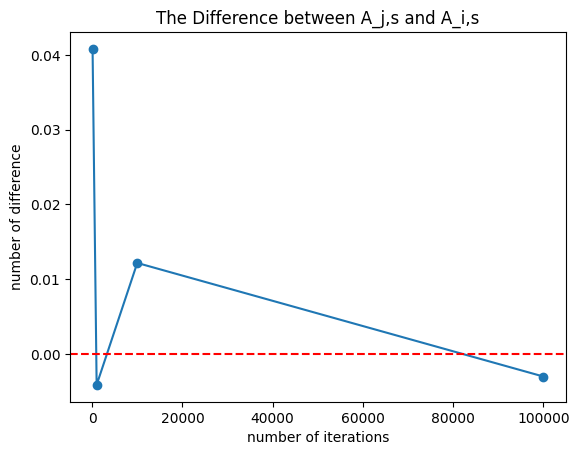

In [54]:
def convergence_iter(max_iter, samples, step=20000):
   
    area_i_s = monte_carlo_mandelbrot_area(max(max_iter), samples, x_min, x_max, y_min, y_max)
    differences = []
    # Calculate A_j,s
    for j in max_iter:
        area_j_s = monte_carlo_mandelbrot_area(j, samples, x_min, x_max, y_min, y_max)
        difference = area_j_s - area_i_s
        differences.append((j, area_j_s, difference))
    return area_i_s, differences

# Example usage
iters = [100, 1000, 10000, 100000]  # Highest number of iterations
samples = 100000   # Number of samples
area_i_s, convergence_data = convergence_iter(iters, samples)
j_values, area_j_s, diff = zip(*convergence_data)
plt.plot(j_values, diff,'-o')
plt.xlabel("number of iterations")
plt.ylabel("number of difference")
plt.axhline(y = 0.0, c="r", ls="--")
plt.title("The Difference between A_j,s and A_i,s")
print("A_i,s = ", area_i_s)
print("A_j,s and diff:", convergence_data)


In [ ]:
def convergence_iter(max_iter, samples, step=20000):
   
    area_i_s = monte_carlo_mandelbrot_area(max(max_iter), samples, x_min, x_max, y_min, y_max)
    differences = []
    # Calculate A_j,s
    for j in max_iter:
        area_j_s = monte_carlo_mandelbrot_area(j, samples, x_min, x_max, y_min, y_max)
        difference = area_j_s - area_i_s
        differences.append((j, area_j_s, difference))
    return area_i_s, differences

# Example usage
iters = [100, 1000, 10000, 100000]  # Highest number of iterations
samples = 100000   # Number of samples
area_i_s, convergence_data = convergence_iter(iters, samples)
j_values, area_j_s, diff = zip(*convergence_data)
plt.plot(j_values, diff,'-o')
plt.xlabel("number of iterations")
plt.ylabel("number of difference")
plt.axhline(y = 0.0, c="r", ls="--")
plt.title("The Difference between A_j,s and A_i,s")
print("A_i,s = ", area_i_s)
print("A_j,s and diff:", convergence_data)


## Estimated results vary with i

[1.568, 1.44, 1.888, 1.552, 1.616, 1.408, 1.984, 1.472, 1.664, 1.504, 1.504, 1.424, 1.472, 1.504, 1.36, 1.552, 1.472, 1.616, 1.728, 1.456, 1.424, 1.472, 1.488, 1.808, 1.552, 1.52, 1.76, 1.344, 1.424, 1.472]
[1.4048, 1.5872, 1.5744, 1.472, 1.5872, 1.5072, 1.5392, 1.472, 1.36, 1.5424, 1.504, 1.3952, 1.4816, 1.5104, 1.2864, 1.5104, 1.4624, 1.5488, 1.5072, 1.488, 1.488, 1.6, 1.6096, 1.5168, 1.5072, 1.5264, 1.456, 1.344, 1.4912, 1.4464]
[1.512, 1.5536, 1.5536, 1.4704, 1.4736, 1.5552, 1.5392, 1.544, 1.48, 1.496, 1.4784, 1.4592, 1.512, 1.5376, 1.4096, 1.56, 1.5616, 1.5552, 1.5008, 1.568, 1.5424, 1.44, 1.5984, 1.5232, 1.5216, 1.5088, 1.496, 1.512, 1.552, 1.5104]
[1.4544, 1.52, 1.50048, 1.51264, 1.50848, 1.50368, 1.552, 1.53504, 1.53792, 1.48416, 1.51904, 1.47328, 1.55552, 1.54176, 1.48544, 1.49792, 1.528, 1.52128, 1.51136, 1.46912, 1.48768, 1.50944, 1.5136, 1.504, 1.53632, 1.54208, 1.5072, 1.51488, 1.48512, 1.52832]


(0.2658608352809422,
 0.1281582056111534,
 0.7886030742281065,
 0.5665752187828546)

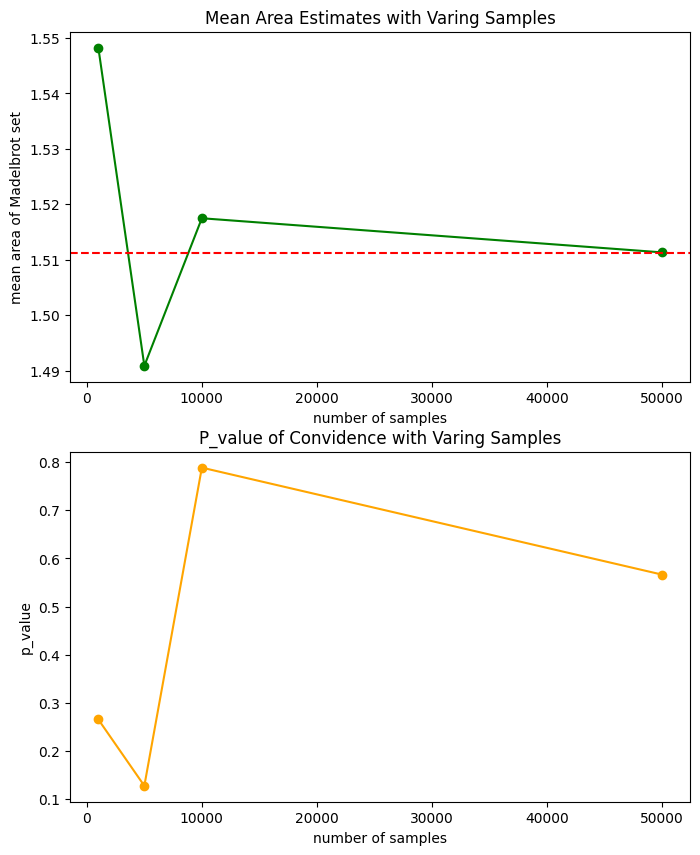

In [ ]:
import scipy.stats as stats

def estimate_area_with_p_value(max_iter, samples, reference_samples, repetitions):
    """Estimate the area of the Mandelbrot set and calculate a p-value comparing it to a reference sample."""
    area_estimates = [monte_carlo_mandelbrot_area(max_iter, samples, x_min, x_max, y_min, y_max) for _ in range(repetitions)]
    reference_area_estimates = [monte_carlo_mandelbrot_area(max_iter, reference_samples, x_min, x_max, y_min, y_max) for _ in range(repetitions)]
    print(area_estimates)
    mean_area = np.mean(area_estimates)
    _, p_value = stats.ttest_ind(area_estimates, reference_area_estimates, equal_var=False)

    return mean_area, p_value

def convergence_sample_with_p_value(max_iter, sample_sizes, repetitions=30):
    convergence_data = []
    max_sample = max(sample_sizes)
    reference_area_estimates = monte_carlo_mandelbrot_area(max_iter, max_sample, x_min, x_max, y_min, y_max)

    for s in sample_sizes:
        mean_area, p_value = estimate_area_with_p_value(max_iter, s, max_sample, repetitions)
        convergence_data.append((s, mean_area, p_value))

    return convergence_data

# Example usage
max_iterations = 1000
sample_sizes = [1000, 5000, 10000, 50000]
convergence_data = convergence_sample_with_p_value(max_iterations, sample_sizes)
sample, area_j_s, p_value = zip(*convergence_data)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
ax1.plot(sample_sizes, area_j_s, '-o', color = 'green')
ax1.axhline(y = 1.51116, c="r", ls="--")
ax1.set_xlabel("number of samples")
ax1.set_ylabel("mean area of Madelbrot set")
ax1.set_title("Mean Area Estimates with Varing Samples")

ax2.plot(sample_sizes, p_value, '-o', color ='orange')
ax2.set_xlabel("number of samples")
ax2.set_ylabel("p_value")
ax2.set_title("P_value of Convidence with Varing Samples")
p_value

## question (3)  
provide​ ​an​ ​estimate​ ​the​ ​accuracy​ ​of​ ​your​ ​computation.
mean area estimate 

In [4]:
# Three sampling methods 
def pure_random_sampling(num_iter, num_sample, x_min, x_max, y_min, y_max):
    points = []
    count_in_set = 0
    for i in range(num_sample):
        x = np.random.uniform(x_min, x_max)
        y = np.random.uniform(y_min, y_max)
        c = complex(x, y)
        m = mandelbrot(c, num_iter)
        points.append((x, y, m))
        if m == num_iter:
            count_in_set += 1
    
    area_sampled = (x_max - x_min) * (y_max - y_min)
    area_estimate = area_sampled * (count_in_set / num_sample)
    return points, area_estimate

def latin_hypercube_sampling(num_iter, num_sample, x_min, x_max, y_min, y_max):
    points = []
    count_in_set = 0
    x_intervals = np.linspace(x_min, x_max, num_sample + 1)
    y_intervals = np.linspace(y_min, y_max, num_sample + 1)

    x_choices = np.random.choice(num_sample, num_sample, replace=False)
    y_choices = np.random.choice(num_sample, num_sample, replace=False)

    for i in range(num_sample):
        x = np.random.uniform(x_intervals[x_choices[i]], x_intervals[x_choices[i] + 1])
        y = np.random.uniform(y_intervals[y_choices[i]], y_intervals[y_choices[i] + 1])
        c = complex(x, y)
        m = mandelbrot(c, num_iter)
        points.append((x, y, m))
        if m == num_iter:
            count_in_set += 1

    area_sampled = (x_max - x_min) * (y_max - y_min)
    area_estimate = area_sampled * (count_in_set / num_sample)
    return points, area_estimate

def orthogonal_sampling(num_iter, num_sample, x_min, x_max, y_min, y_max):
    points = []
    count_in_set = 0
    n_subspaces = int(np.sqrt(num_sample))
    x_subspaces = np.linspace(x_min, x_max, n_subspaces + 1)
    y_subspaces = np.linspace(y_min, y_max, n_subspaces + 1)

    for i in range(n_subspaces):
        for j in range(n_subspaces):
            x = np.random.uniform(x_subspaces[i], x_subspaces[i + 1])
            y = np.random.uniform(y_subspaces[j], y_subspaces[j + 1])
            c = complex(x, y)
            m = mandelbrot(c, num_iter)
            points.append((x, y, m))
            if m == num_iter:
                count_in_set += 1

    area_sampled = (x_max - x_min) * (y_max - y_min)
    area_estimate = area_sampled * (count_in_set / num_sample)
    return points, area_estimate

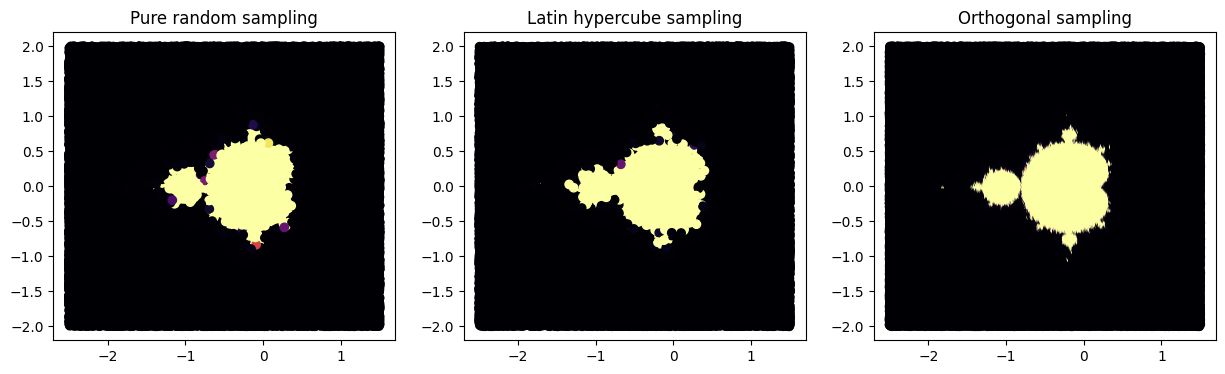

1.5056
1.51456
1.51008


In [38]:
# Define the complex plane domain
x_min = -2.5
x_max = 1.5
y_min = -2
y_max = 2
num_iter = 1000
num_sample = 100000


points_pure, area_pure = pure_random_sampling(num_iter, num_sample, x_min, x_max, y_min, y_max)
points_latin, area_latin = latin_hypercube_sampling(num_iter, num_sample, x_min, x_max, y_min, y_max)
points_ortho, area_orthogonal = orthogonal_sampling(num_iter, num_sample, x_min, x_max, y_min, y_max)

# Plot
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.scatter([p[0] for p in points_pure], [p[1] for p in points_pure], c=[p[2] for p in points_pure], cmap='inferno')
plt.title('Pure random sampling')
plt.subplot(1, 3, 2)
plt.scatter([p[0] for p in points_latin], [p[1] for p in points_latin], c=[p[2] for p in points_latin], cmap='inferno')
plt.title('Latin hypercube sampling')
plt.subplot(1, 3, 3)
plt.scatter([p[0] for p in points_ortho], [p[1] for p in points_ortho], c=[p[2] for p in points_ortho], cmap='inferno')
plt.title('Orthogonal sampling')
plt.show()
print(area_pure)
print(area_latin)
print(area_orthogonal)

Standard Deviations: {'pure_random_sampling': 0.016259019841989925, 'latin_hypercube_sampling': 0.008275582289012798, 'orthogonal_sampling': 0.0015989774510257687}


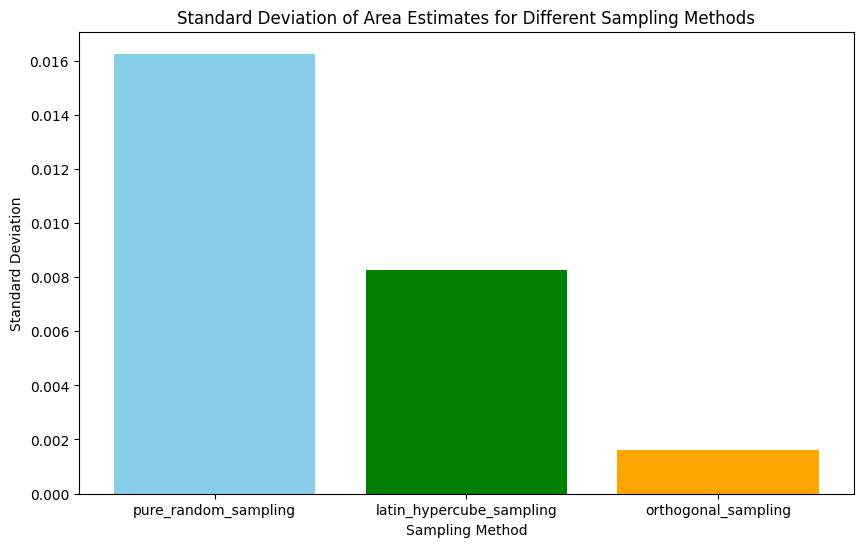

In [44]:
def estimate_area_sampling_method(sampling_method, num_iter, num_sample, x_min, x_max, y_min, y_max, repetitions):
    """Estimate the area of the Mandelbrot set using a given sampling method."""
    area_estimates = []
    for _ in range(repetitions):
        _, area_estimate = sampling_method(num_iter, num_sample, x_min, x_max, y_min, y_max)
        area_estimates.append(area_estimate)
    return area_estimates

def analyze_sampling_methods(num_iter, num_sample, repetitions):
    """Analyze different sampling methods for estimating the Mandelbrot set area."""
    methods = [pure_random_sampling, latin_hypercube_sampling, orthogonal_sampling]
    standard_deviations = {}

    for method in methods:
        area_estimates = estimate_area_sampling_method(method, num_iter, num_sample, x_min, x_max, y_min, y_max, repetitions)
        standard_deviations[method.__name__] = np.std(area_estimates)

    return standard_deviations

# Example usage
max_iterations = 1000
num_sample = 100000
repetitions = 30

std_deviations = analyze_sampling_methods(max_iterations, num_sample, repetitions)
print("Standard Deviations:", std_deviations)

# Plotting standard deviations
methods = list(std_deviations.keys())
std_values = list(std_deviations.values())

plt.figure(figsize=(10, 6))
plt.bar(methods, std_values, color=['skyblue', 'g', 'orange'])
plt.title("Standard Deviation of Area Estimates for Different Sampling Methods")
plt.xlabel("Sampling Method")
plt.ylabel("Standard Deviation")
plt.show()

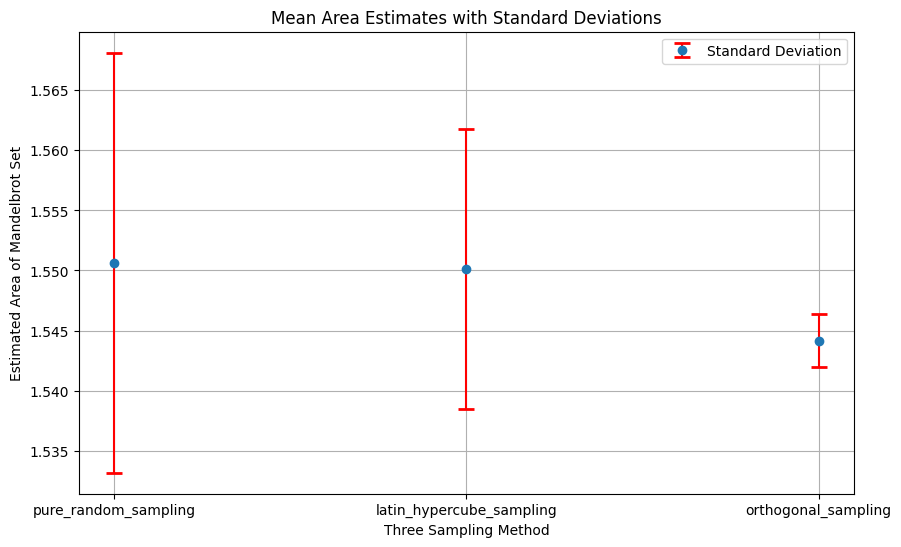

In [45]:
def analyze_sampling_methods2(num_iter, num_sample, repetitions):
    """Analyze different sampling methods for estimating the Mandelbrot set area."""
    methods = [pure_random_sampling, latin_hypercube_sampling, orthogonal_sampling]
    mean_areas = {}
    standard_deviations = {}
    # Get area estimates for each method and calculate statistics
    for method in methods:
        area_estimates = estimate_area_sampling_method(method, num_iter, num_sample, x_min, x_max, y_min, y_max, repetitions)
        mean_areas[method.__name__] = np.mean(area_estimates)
        standard_deviations[method.__name__] = np.std(area_estimates)

    return mean_areas, standard_deviations


# Example usage
max_iterations = 100
num_sample = 100000
repetitions = 30

mean_areas, standard_deviations = analyze_sampling_methods2(max_iterations, num_sample, repetitions)
   
   
methods = list(mean_areas.keys())
means = list(mean_areas.values())
std_devs = list(standard_deviations.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(methods, means, yerr=std_devs, fmt='o', capsize=6, capthick=2, ecolor='red', label='Standard Deviation')
plt.title("Mean Area Estimates with Standard Deviations")
plt.xlabel("Three Sampling Method")
plt.ylabel("Estimated Area of Mandelbrot Set")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
mean_areas, standard_deviations

({'pure_random_sampling': 1.5468853333333332,
  'latin_hypercube_sampling': 1.5487946666666668,
  'orthogonal_sampling': 1.544704},
 {'pure_random_sampling': 0.012581161507940702,
  'latin_hypercube_sampling': 0.014150459058120894,
  'orthogonal_sampling': 0.0020949615748266106})

In [ ]:
import numpy as np
import scipy.stats as stats

# Assume definitions of pure_random_sampling, latin_hypercube_sampling, and orthogonal_sampling are available



def calculate_confidence_interval(area_estimates, confidence_level=0.95):
    """Calculate the confidence interval for a set of area estimates."""
    mean_area = np.mean(area_estimates)
    std_error = stats.sem(area_estimates)
    margin_of_error = std_error * stats.t.ppf((1 + confidence_level) / 2, len(area_estimates) - 1)
    lower_bound = mean_area - margin_of_error
    upper_bound = mean_area + margin_of_error
    return lower_bound, upper_bound

def analyze_sampling_methods(num_iter, num_sample, repetitions):
    """Analyze different sampling methods for estimating the Mandelbrot set area."""
    methods = [pure_random_sampling, latin_hypercube_sampling, orthogonal_sampling]
    confidence_intervals = {}

    for method in methods:
        area_estimates = estimate_area_sampling_method(method, num_iter, num_sample, x_min, x_max, y_min, y_max, repetitions)
        confidence_intervals[method.__name__] = calculate_confidence_interval(area_estimates)

    return confidence_intervals

# Example usage
max_iterations = 1000
num_sample = 10000
repetitions = 30

confidence_intervals = analyze_sampling_methods(max_iterations, num_sample, repetitions)
print("Confidence Intervals:", confidence_intervals)


Confidence Intervals: {'pure_random_sampling': (1.477006671908579, 1.5131799947580877), 'latin_hypercube_sampling': (1.4991479433221528, 1.532105390011181), 'orthogonal_sampling': (1.5049927755906602, 1.5129272244093395)}


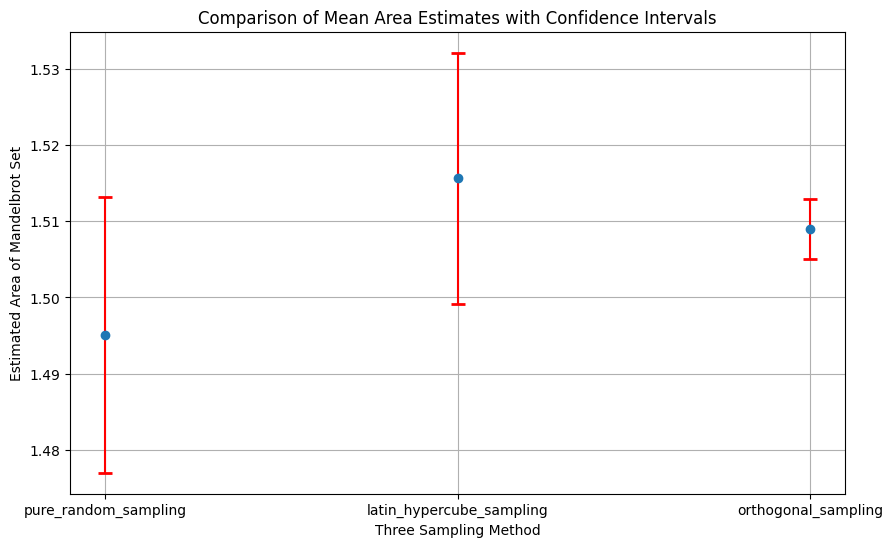

In [ ]:
# Extracting mean areas and confidence interval bounds
methods = list(confidence_intervals.keys())
mean_areas = [(ci[0] + ci[1]) / 2 for ci in confidence_intervals.values()]
lower_bounds = [mean_areas[i] - confidence_intervals[methods[i]][0] for i in range(len(methods))]
upper_bounds = [confidence_intervals[methods[i]][1] - mean_areas[i] for i in range(len(methods))]

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(methods, mean_areas, yerr=[lower_bounds, upper_bounds], fmt='o', capsize=5, capthick=2, ecolor='red')
plt.title("Comparison of Mean Area Estimates with Confidence Intervals")
plt.ylabel("Estimated Area of Mandelbrot Set")
plt.grid(True)
plt.show()


## Adaptive Sampling  
Devide the sampling region into subregions alike the method in the orthogonal sampling subgrid. However, the refined sampling would be based on initial sampling, this time the subregion with higher integration complexity will be assigned with higher sampling density.  
The complexity of the region is measured by the the uncertainty in the initial sampling.  
The number of subregions is desided by the number of sampling applied. To make sure enough sampling in every subregion is applied to have a reliable determination of complexcity. We make sure at least $s_0=100$ is applied in the subregion. than we subgrid the sampling region into squre with side length $\lfloor\sqrt{s/s_0}\rfloor$

In [5]:
# Adaptive Sampling

def sample_subregion(x_bounds, y_bounds, num_samples):
    x_samples = np.random.uniform(x_bounds[0], x_bounds[1], num_samples)
    y_samples = np.random.uniform(y_bounds[0], y_bounds[1], num_samples)
    return np.column_stack((x_samples, y_samples))

def adaptive_sampling(x_min, x_max, y_min, y_max, total_samples, num_iter, s0, complexity_weight):
    # Determine the number of subregions
    N = int(np.sqrt(total_samples / s0))

    # Divide the sampling area into subregions and perform initial sampling
    x_grid = np.linspace(x_min, x_max, N+1)
    y_grid = np.linspace(y_min, y_max, N+1)
    subregion_complexity = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            x_bounds = (x_grid[i], x_grid[i+1])
            y_bounds = (y_grid[j], y_grid[j+1])
            subregion_samples = sample_subregion(x_bounds, y_bounds, s0)
            subregion_iterations = [mandelbrot(complex(x, y), num_iter) for x, y in subregion_samples]
            subregion_complexity[i, j] = np.var(subregion_iterations)

    # Normalize complexity and determine additional sampling density
    normalized_complexity = subregion_complexity / np.sum(subregion_complexity)
    sampling_density = np.floor(normalized_complexity * (complexity_weight * total_samples) + (1 - complexity_weight) * total_samples / (N * N)).astype(int)


    # Refined sampling based on complexity
    estimated_proportions = []
    for i in range(N):
        for j in range(N):
            x_bounds = (x_grid[i], x_grid[i+1])
            y_bounds = (y_grid[j], y_grid[j+1])
            num_samples_subregion = sampling_density[i, j]
            subregion_samples = sample_subregion(x_bounds, y_bounds, num_samples_subregion)
            complex_subregion_samples = subregion_samples[:, 0] + 1j * subregion_samples[:, 1]
            refined_test = [mandelbrot(c, num_iter) for c in complex_subregion_samples]
            points_inside = len([test for test in refined_test if test == num_iter])
            estimated_proportions.append(points_inside / len(refined_test) if len(refined_test) > 0 else 0)

    # Final area estimation
    sampled_area_per_subregion = (x_max - x_min) * (y_max - y_min) / (N * N)
    estimated_total_area = np.sum(estimated_proportions) * sampled_area_per_subregion
    return estimated_total_area

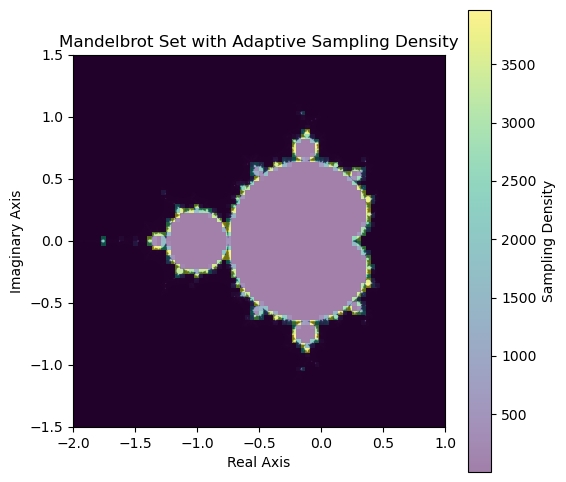

1.5102248912602732


In [6]:
# Demonstration of adaptive sampling and generate a computing power available as standard convergence
# Settings
x_min = -2.0
x_max = 1.0
y_min = -1.5
y_max = 1.5

num_sample = 640000
num_iter = 1000
s0 = 100  
complexity_weight = 0.95
# Determine the number of subregions
N = int(np.sqrt(num_sample / s0))

# Divide the sampling area into subregions and perform initial sampling
x_grid = np.linspace(x_min, x_max, N+1)
y_grid = np.linspace(y_min, y_max, N+1)
subregion_complexity = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        x_bounds = (x_grid[i], x_grid[i+1])
        y_bounds = (y_grid[j], y_grid[j+1])
        subregion_samples = sample_subregion(x_bounds, y_bounds, s0)
        subregion_iterations = [mandelbrot(complex(x, y), num_iter) for x, y in subregion_samples]
        subregion_complexity[i, j] = np.var(subregion_iterations)

# Normalize complexity and determine additional sampling density
normalized_complexity = subregion_complexity / np.sum(subregion_complexity)
sampling_density = np.floor(normalized_complexity * (complexity_weight * num_sample) + (1 - complexity_weight) * num_sample / (N * N)).astype(int)

# Create a grid for plotting the Mandelbrot set
width, height = 800, 800
real = np.linspace(x_min, x_max, width)
imag = np.linspace(y_min, y_max, height)
real_grid, imag_grid = np.meshgrid(real, imag)
c_grid = real_grid + 1j * imag_grid
mandelbrot_set = np.array([[mandelbrot(c, num_iter) for c in row] for row in c_grid])

# Plotting the Mandelbrot set
plt.figure(figsize=(6, 6))
plt.imshow(mandelbrot_set, extent=[x_min, x_max, y_min, y_max], cmap='bone', origin='lower')

# Overlaying the heatmap of sampling density
# Transpose the sampling_density array to exchange x and y
sampling_density_transposed = sampling_density.T

# Plotting the transposed sampling density
plt.imshow(sampling_density_transposed, cmap='viridis', alpha=0.5, extent=[x_min, x_max, y_min, y_max], origin='lower')
plt.colorbar(label='Sampling Density')
plt.title('Mandelbrot Set with Adaptive Sampling Density')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.show()

# Refined sampling based on complexity
estimated_proportions = []
for i in range(N):
    for j in range(N):
        x_bounds = (x_grid[i], x_grid[i+1])
        y_bounds = (y_grid[j], y_grid[j+1])
        num_samples_subregion = sampling_density[i, j]
        subregion_samples = sample_subregion(x_bounds, y_bounds, num_samples_subregion)
        complex_subregion_samples = subregion_samples[:, 0] + 1j * subregion_samples[:, 1]
        refined_test = [mandelbrot(c, num_iter) for c in complex_subregion_samples]
        points_inside = len([test for test in refined_test if test == num_iter])
        estimated_proportions.append(points_inside / len(refined_test) if len(refined_test) > 0 else 0)

# Final area estimation
sampled_area_per_subregion = (x_max - x_min) * (y_max - y_min) / (N * N)
standard_value = np.sum(estimated_proportions) * sampled_area_per_subregion
print(standard_value)

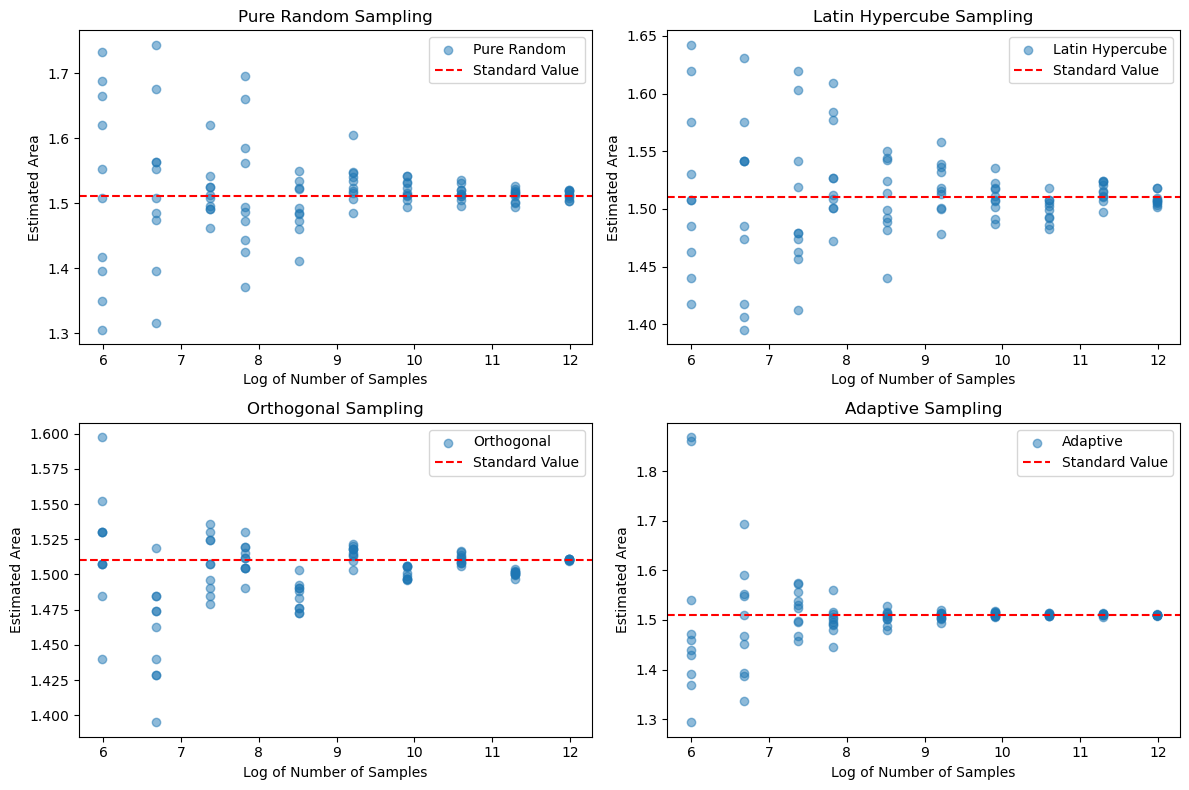

In [7]:
# Parameters for the Mandelbrot set and sampling
x_min = -2.0
x_max = 1.0
y_min = -1.5
y_max = 1.5

num_samples = [400,800,1600,2500,5000,10000,20000,40000,80000,160000]
num_iters = [1000] 
s0 = 100  
complexity_weight = 0.95
num_repetitions = 10

log_num_samples=np.log(num_samples)

# Prepare the figure and axes for the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # Adjust the figsize as needed
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easier access

for num_iter in num_iters:
    # Stores all the areas for each repetition for all methods
    method_areas = {
        'Pure Random': [],
        'Latin Hypercube': [],
        'Orthogonal': [],
        'Adaptive': []
    }
    
    # Repeat calculations
    for _ in range(num_repetitions):
        for num_sample in num_samples:
            # Run each sampling method
            _, area_pure = pure_random_sampling(num_iter, num_sample, x_min, x_max, y_min, y_max)
            _, area_latin = latin_hypercube_sampling(num_iter, num_sample, x_min, x_max, y_min, y_max)
            _, area_ortho = orthogonal_sampling(num_iter, num_sample, x_min, x_max, y_min, y_max)
            area_adaptive = adaptive_sampling(x_min, x_max, y_min, y_max, num_sample, num_iter, s0, complexity_weight)
            
            # Append the results to the lists
            method_areas['Pure Random'].append((np.log(num_sample), area_pure))
            method_areas['Latin Hypercube'].append((np.log(num_sample), area_latin))
            method_areas['Orthogonal'].append((np.log(num_sample), area_ortho))
            method_areas['Adaptive'].append((np.log(num_sample), area_adaptive))

    # Plot the results for each method on separate subplots
    for ax, (method_name, areas) in zip(axes, method_areas.items()):
        x, y = zip(*areas)  # Unpack the list of tuples into separate x and y lists
        ax.scatter(x, y, alpha=0.5, label=f'{method_name}')
        
        # Add the standard line for reference
        ax.axhline(y=standard_value, color='r', linestyle='--', label='Standard Value')

        # Set plot labels and title for each subplot
        ax.set_xlabel("Log of Number of Samples")
        ax.set_ylabel("Estimated Area")
        ax.set_title(f"{method_name} Sampling")
        ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()